<a href="https://colab.research.google.com/github/akshay310/FYP_KHCR/blob/main/FYP_KHCR_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
data = pd.read_csv('kannada_full_data.csv', dtype=str)
duplicates = data[data.duplicated()]
data = data.drop_duplicates()
data = shuffle(data)
data = shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5099,ya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3563,ta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2347,am,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4843,bha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1507,uuu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,nna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1607843137254902,0.01568627450980392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,aha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3740,dda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np

X = data.drop(["label"],axis=1)
Y = data["label"]

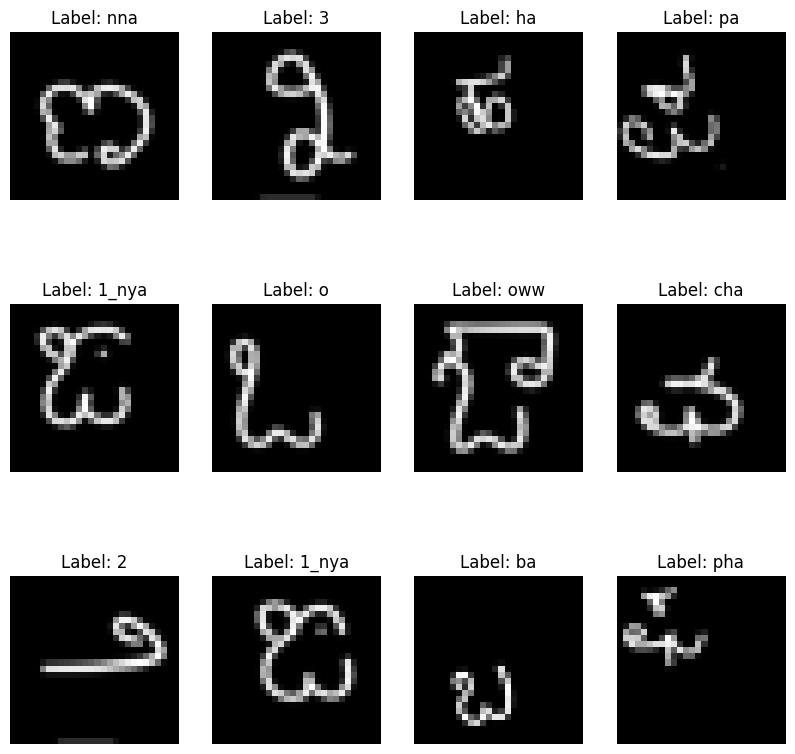

In [ ]:
import matplotlib.pyplot as plt
def display_shuffled_images(images, labels, rows, cols):
  combined_data = list(zip(images, labels))
  np.random.shuffle(combined_data)
  shuffled_images, shuffled_labels = zip(*combined_data)

  fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

  for i in range(rows):
    for j in range(cols):
      idx = i*cols + j
      img = shuffled_images[idx].reshape(28, 28).astype(float)
      label = shuffled_labels[idx]

      axes[i, j].imshow(img, cmap='gray')
      axes[i, j].set_title(f"Label: {label}")
      axes[i, j].axis('off')

  plt.show()

num_rows = 3
num_cols = 4
display_shuffled_images(X.values, Y, num_rows, num_cols)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
train_x = np.load("train_x.npy")
train_y = np.load("train_y.npy")
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=6)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=6)

In [ ]:
from sklearn.svm import SVC
svm_model1 = SVC(kernel='rbf', random_state=6
                )
svm_model1.fit(X_train, y_train)

SVC(random_state=6)

In [ ]:
import joblib
joblib.dump(svm_model, "svm(digits+a-aha)")

['svm(digits+a-aha)']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load the trained SVC model
svc_model = joblib.load("svm(digits+a-aha)")

# Assuming X_test_imputed and test_y are correctly loaded and preprocessed
predictions = svc_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, predictions) * 100
precision = precision_score(y_test, predictions, average='weighted') * 100
recall = recall_score(y_test, predictions, average='weighted') * 100
f1 = f1_score(y_test, predictions, average='weighted') * 100

# Print the metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 85.26%
Precision: 87.39%
Recall: 85.26%
F1 Score: 85.43%


In [ ]:
import joblib
joblib.dump(svm_model1, "svm(digits+a-aha)")

['svm(digits+a-aha)']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load the trained SVC model
svc_model1 = joblib.load("svm(digits+a-aha)")

# Assuming X_test_imputed and test_y are correctly loaded and preprocessed
predictions = svc_model1.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, predictions) * 100
precision = precision_score(y_test, predictions, average='weighted') * 100
recall = recall_score(y_test, predictions, average='weighted') * 100
f1 = f1_score(y_test, predictions, average='weighted') * 100

# Print the metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 87.25%
Precision: 88.44%
Recall: 87.25%
F1 Score: 87.21%


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_y)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

# Reshape the data for CNN input
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.1307 - loss: 2.9605 - val_accuracy: 0.6133 - val_loss: 1.3213
Epoch 2/80
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6690 - loss: 1.1101 - val_accuracy: 0.7644 - val_loss: 0.8027
Epoch 3/80
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8079 - loss: 0.6363 - val_accuracy: 0.8667 - val_loss: 0.5247
Epoch 4/80
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8710 - loss: 0.4358 - val_accuracy: 0.8622 - val_loss: 0.4721
Epoch 5/80
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9052 - loss: 0.2950 - val_accuracy: 0.8889 - val_loss: 0.4426
Epoch 6/80
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9364 - loss: 0.2101 - val_accuracy: 0.8978 - val_loss: 0.3650
Epoch 7/80
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9439 - loss: 0.1825 - val_accuracy: 0.8889 - val_loss: 0.3633
Epoch 8/80
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9656 - loss: 0.1186 - val_accuracy: 0.8889 - v

In [ ]:
model.save('model/cnn(digits+a-laa).keras')

In [ ]:
from tensorflow.keras.models import load_model

cnn_model=load_model("model/cnn(digits+a-laa).h5")

y_pred_probs = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
accuracy_cnn = accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100
precision_cnn = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted', zero_division=1)*100
recall_cnn = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')*100
f1_cnn = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')*100

# Display the results
print("Convolutional Neural Network (CNN):")
print("Accuracy: {:.2f}%".format(accuracy_cnn))
print("Precision: {:.2f}%".format(precision_cnn))
print("Recall: {:.2f}%".format(recall_cnn))
print("F1-score: {:.2f}%".format(f1_cnn))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Convolutional Neural Network (CNN):
Accuracy: 92.83%
Precision: 93.51%
Recall: 92.83%
F1-score: 92.78%


In [ ]:
pip install pyscreenshot

In [ ]:
!pip install opencv-python
!pip install Pillow

import cv2  # OpenCV
from PIL import Image  # Pillow

In [ ]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab
from tensorflow.keras.models import load_model


model = load_model("model/cnn(digits+a-laa).h5")  # Update with the correct path to your Kannada digit and alphabet recognition model

images_folder = "img/"

character_actual = None  # Variable to store the actual digit or alphabet drawn by the user

while True:
    img = ImageGrab.grab(bbox=(60, 170, 400, 500))  # Adjust the coordinates to capture the appropriate region

    img.save(images_folder + "img.png")
    im = cv2.imread(images_folder + "img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

    rows, cols = roi.shape

    X = []

    # Add pixel one by one into the data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k > 100:
                k = 1
            else:
                k = 0
            X.append(k)

    X = np.array(X)  # Convert X to a NumPy array
    if not any(X):
        character = "noCharVisible"
    else:
        prediction = model.predict(X.reshape(1, 28, 28, 1))
        predicted_class_index = np.argmax(prediction)  # Find the index of the maximum value

    # Inverse transform the predicted class index to get the corresponding label
        character = label_encoder.inverse_transform([predicted_class_index])[0]

    # Draw prediction and accuracy on the image
    cv2.putText(im, "Prediction: " + str(character), (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)

    # Wait for user input to set the actual digit or alphabet
    key = cv2.waitKey(1)
    if key == 27:  # If ESC key is pressed, exit the loop
        break

cv2.destroyAllWindows()

FailedBackendError: All backends failed!

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


# Replace with the path to your uploaded model in Colab
model = load_model("/content/model/cnn(digits+a-laa).h5")

# Function to pre-process an image (replace with your image loading logic)
def preprocess_image(image_path):
    # Load the image (consider using OpenCV's `cv2.imread` or other techniques)
    im = cv2.imread(image_path)

    # Check if the image loaded correctly
    if im is None:
        print(f"Error: Could not load image at {image_path}")
        return None

    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

    rows, cols = roi.shape

    X = []
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k > 100:
                k = 1
            else:
                k = 0
            X.append(k)

    X = np.array(X)
    return X.reshape(1, 28, 28, 1)  # Reshape for model prediction

# Main loop (assuming you have a way to get image paths)
while True:
    # Replace with the actual image path
    image_path = "img/img.png"

    # Preprocess the image
    X = preprocess_image(image_path)
    if X is None:
        break # Exit the loop if image loading failed

    # Make prediction
    prediction = model.predict(X)
    predicted_class_index = np.argmax(prediction)

    # Inverse transform (assuming you have a label encoder loaded in Colab)
    character = label_encoder.inverse_transform([predicted_class_index])[0]

    # Print prediction (you can't display an image directly in Colab terminal)
    print("Prediction:", character)

    # Break loop if needed (replace with your termination logic)
    break

# Clean up (optional)
cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: 'classes.npy'

In [ ]:
!apt-get update
!apt-get install -y xvfb

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [999 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 http:

In [ ]:
pip install xvfbwrapper


  Preparing metadata (setup.py) ... done
  Created wheel for xvfbwrapper: filename=xvfbwrapper-0.2.9-py3-none-any.whl size=5009 sha256=a46ef703ce3fedbb21bdaba74e2dce5b4467f8cc724e5fd8b4d52767459d7a08
  Stored in directory: /root/.cache/pip/wheels/cb/10/7d/2b7fdffccf837f7d5425931575fbee9caebe2c190931f9058b
Successfully built xvfbwrapper


ERROR: Could not find a version that satisfies the requirement google-colab-patches (from versions: none)
ERROR: No matching distribution found for google-colab-patches


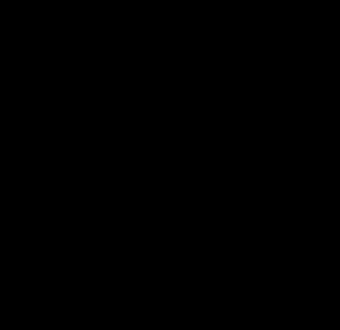

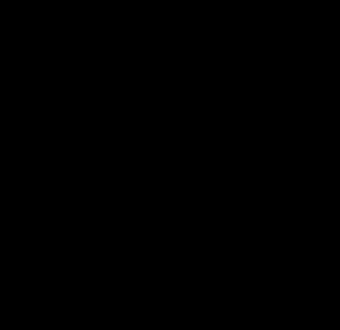

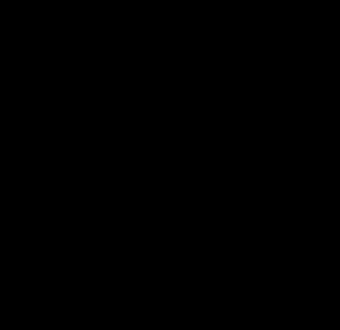

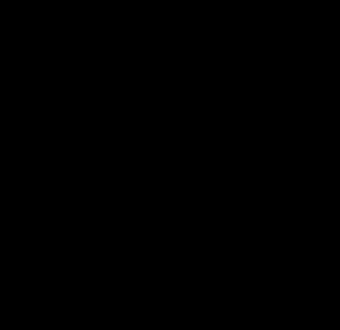

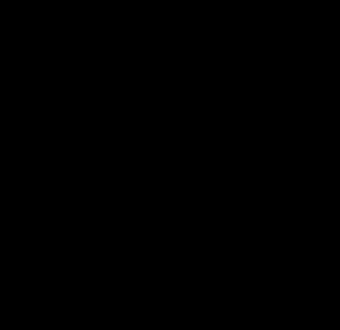

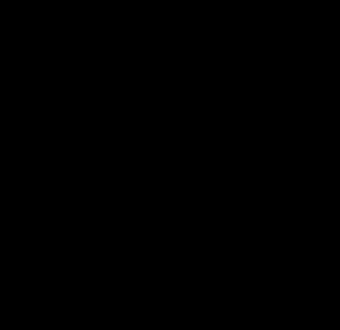

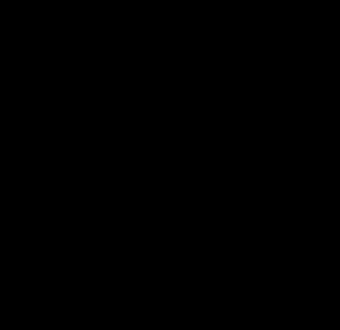

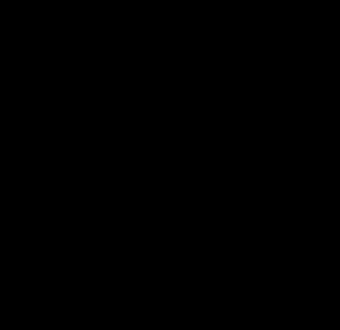

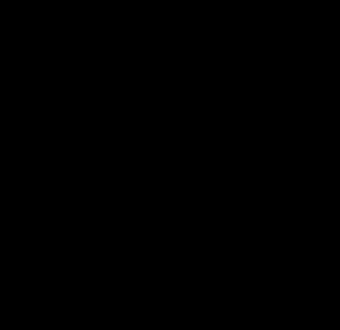

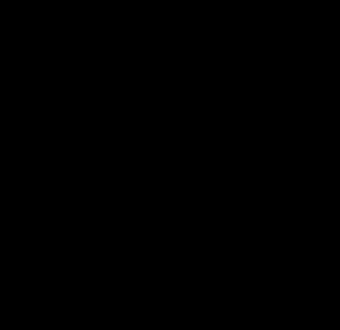

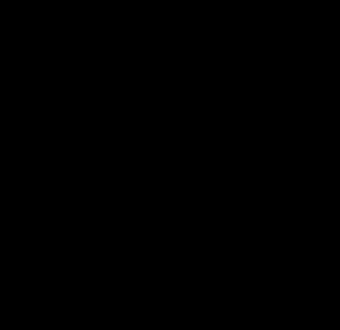

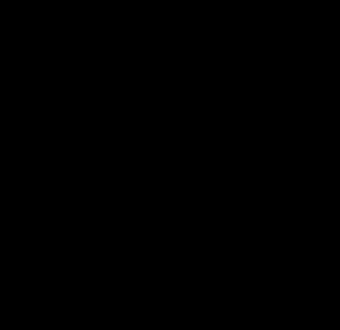

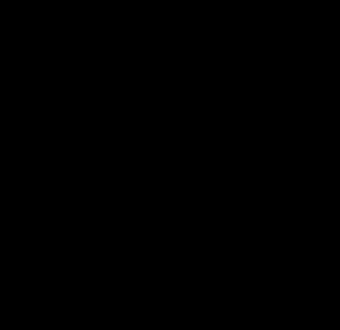

KeyboardInterrupt: 

In [ ]:
!pip install google-colab-patches
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab
from tensorflow.keras.models import load_model
from xvfbwrapper import Xvfb # import Xvfb
from google.colab.patches import cv2_imshow # import cv2_imshow


model = load_model("model/cnn(digits+a-laa).h5")  # Update with the correct path to your Kannada digit and alphabet recognition model

images_folder = "img/"

character_actual = None  # Variable to store the actual digit or alphabet drawn by the user

with Xvfb(): # use Xvfb as a context manager
    while True:
        img = ImageGrab.grab(bbox=(60, 170, 400, 500))  # Adjust the coordinates to capture the appropriate region

        img.save(images_folder + "img.png")
        im = cv2.imread(images_folder + "img.png")
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

        # Threshold the image
        ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
        roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

        rows, cols = roi.shape

        X = []

        # Add pixel one by one into the data array
        for i in range(rows):
            for j in range(cols):
                k = roi[i, j]
                if k > 100:
                    k = 1
                else:
                    k = 0
                X.append(k)

        X = np.array(X)  # Convert X to a NumPy array
        if not any(X):
            character = "noCharVisible"
        else:
            prediction = model.predict(X.reshape(1, 28, 28, 1))
            predicted_class_index = np.argmax(prediction)  # Find the index of the maximum value

        # Inverse transform the predicted class index to get the corresponding label
            #character = label_encoder.inverse_transform([predicted_class_index])[0] # label_encoder is not defined

        # Draw prediction and accuracy on the image
            cv2.putText(im, "Prediction: " + str(character), (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.startWindowThread()
        cv2.namedWindow("Result")
        cv2_imshow(im) # use cv2_imshow instead of cv2.imshow

        # Wait for user input to set the actual digit or alphabet
        key = cv2.waitKey(1)
        if key == 27:  # If ESC key is pressed, exit the loop
            break

cv2.destroyAllWindows()